In [7]:
import sys
sys.path.insert(0, '/mnt/data/Eva/Simulation/SRKAnalysis/SRKAnalysis')
sys.path.insert(1, '/opt/root6/root-build/lib')
import srkglobal
import srkplotting as spl
import numpy as np

In [8]:
srkglobal.set_computer("work_desktop")
srkglobal.set_graphs_dir('/mnt/data/Eva/Simulation/work/graphs/vortrag/')
bid = 477
base_phi = spl.make_tree_to_array(bid)[4]
base_theta = spl.make_tree_to_array(bid)[5]
time_arr = spl.make_timeline(bid)

osci_x = [spl.make_tree_to_array(bid+5),spl.make_tree_to_array(bid+6),spl.make_tree_to_array(bid+7)]
osci_z = [spl.make_tree_to_array(bid+9),spl.make_tree_to_array(bid+10),spl.make_tree_to_array(bid+11)]
spiral = [spl.make_tree_to_array(bid+13),spl.make_tree_to_array(bid+14),spl.make_tree_to_array(bid+15)]
#corresponds to [Bquad, Bsext, Bboth], within: [posx, posz, velx, velz, phi, theta]

In [9]:
rel_phi = np.empty([3,3,len(time_arr)])
for i in range(3):
    rel_phi[0,i] = spl.delta_phi(osci_x[i][4], base_phi)
    rel_phi[1,i] = spl.delta_phi(osci_z[i][4], base_phi)
    rel_phi[2,i] = spl.delta_phi(spiral[i][4], base_phi)
    
abs_phi = np.empty([3,3,len(time_arr)])
for i in range(3):
    abs_phi[0,i] = spl.delta_phi(osci_x[i][4], base_phi, True)
    abs_phi[1,i] = spl.delta_phi(osci_z[i][4], base_phi, True)
    abs_phi[2,i] = spl.delta_phi(spiral[i][4], base_phi, True)
    
#[osci_x, osci_z, spiral], within [B_quad, B_sext, B_both]


In [10]:
from scipy.optimize import curve_fit

middle = ['Ax=10mm', 'Ay=10mm', 'Ax=Ay=10mm']
#middle = ['Ax=42mm', 'Ay=17mm', 'Ax=42mm, Ay=17mm']
end = ['B_quad', 'B_sext', 'B_total']

m=0
n=0

def lin(xdata, slope, intercept):
    return slope*xdata + intercept
def lin_zero(xdata, slope):
    return slope*xdata
def lin_off(xdata, intercept):
    return np.full(xdata.shape, intercept)

def sinus(t, A, w):
    return A*np.sin(w*t)
def sinus_dec(t, A, w):
    return (A/t)*np.sin(w*t)

def combined_zero(t, A, w, s):
    return sinus(t, A, w) + lin_zero(t, s)
def combined(t, A, w, s, o):
    return sinus_dec(t, A, w) + lin(t, s, o)

In [11]:
for i in range(3):
    for j in range(3):
        cfphase_pars, cfphase_covs = curve_fit(lin_zero, time_arr, abs_phi[i][j], [abs_phi[i][j][-1]/23.9e-6])
#        spl.plot_comparative('Phase difference in CF - '+middle[i]' - '+end[j], [abs_phi[i][j], lin_zero(time_arr, cfphase_pars[0])], time_arr, 'both', r'$\Delta \varphi$ [rad]', ['Simulation, 'Linear Fit, slope '+str(cfphase_pars[0])], '.-')
        print middle[i] + " " + end[j] + ": " + str(cfphase_pars[0]) + " +- " + str(cfphase_covs[0][0])
#        lphase_pars, lphase_covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[i][j]/29.3, [abs_phi[i][j][-1]/(29.3*29.3*23.9e-6)]
#        spl.plot_comparative('Phase difference in Lab - '+middle[i]' - '+end[j], [abs_phi[i][j]/29.3, lin_zero(time_arr*29.3, lphase_pars[0])], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(lphase_pars[0])], '.-')


Ax=10mm B_quad: 6.10516150615e-05 +- 1.1009474683e-06
Ax=10mm B_sext: 0.915170628357 +- 8.75028374928e-16
Ax=10mm B_total: 0.915231679969 +- 1.10094746924e-06
Ay=10mm B_quad: -1.84510799361e-10 +- 2.27965418388e-24
Ay=10mm B_sext: -0.915171282624 +- 5.51136965825e-15
Ay=10mm B_total: -0.915171282807 +- 5.51136935851e-15
Ax=Ay=10mm B_quad: 6.10514303712e-05 +- 1.1009474683e-06
Ax=Ay=10mm B_sext: -6.82671628498e-07 +- 5.22238628772e-14
Ax=Ay=10mm B_total: 6.03687544098e-05 +- 1.10094759366e-06


In [ ]:
for i in range(3):
    for j in range(3):
        cgfreq_pars, cffreq_covs = curve_fit

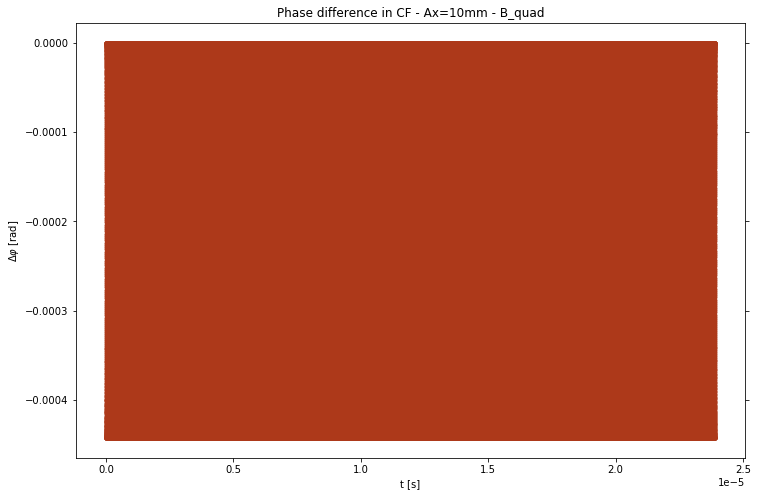

[-13.89050624] [[ 0.00040368]]


/usr/lib64/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [6]:
spl.plot_single('Phase difference in CF - '+middle[m]+' - '+end[n], abs_phi[m][n], time_arr, 'show', r'$\Delta \varphi$ [rad]', False, '.')
#m=0
#n=0

wx=1.1466e09
wy=4.5685e08

pars, covs = curve_fit(lin_zero, time_arr, abs_phi[m][n], [-0.45])
#pars, covs = curve_fit(combined_zero, time_arr, abs_phi[m][n], [14e-6, wx, 0])
print pars, covs

#spl.plot_comparative('New Phase difference in CF - '+middle[m]+' - '+end[n], [abs_phi[m][n], lin_zero(time_arr, pars[0])], time_arr, 'show', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(pars[0])], '.-')
#spl.plot_comparative('Phase difference in CF - '+middle[m]+' - '+end[n], [abs_phi[m][n], lin_zero(time_arr, pars[2])], time_arr, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Sinusoidal + Linear Fit, slope '+str(pars[2])], '.-')
#spl.plot_single('Phase difference from fit in CF - '+middle[m]+' - '+end[n], abs_phi[m][n] - lin_zero(time_arr, pars[0]), time_arr, 'both', r'$\Delta \varphi - \Delta \varphi_{fit}$ [rad]', False, '.')


In [14]:
pars1, covs1 = curve_fit(lin_zero, time_arr, spiral[2][4], [-3e10])
pars2, covs2 = curve_fit(lin_zero, time_arr, base_phi, [-3e10])
print pars1, covs1
print pars2, covs2
print pars1[0]-pars2[0]

[  3.74408289e+10] [[ 6777.63459904]]
[  3.74408289e+10] [[ 6777.63418246]]
0.37654876709


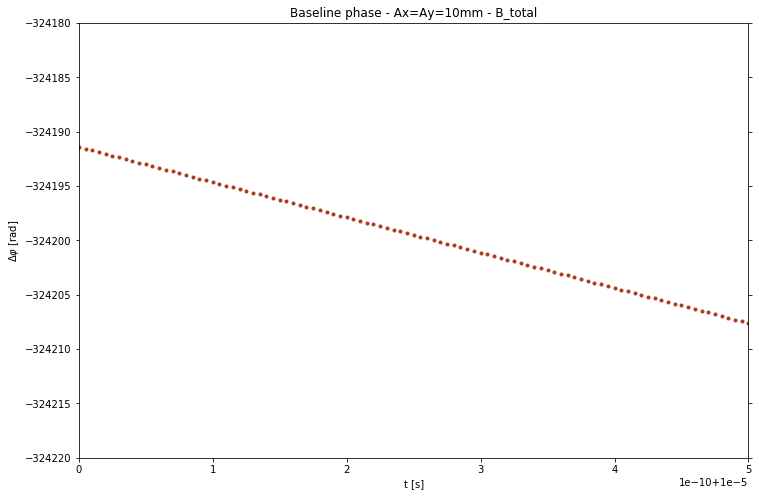

In [38]:
spl.plot_single('Baseline phase - '+middle[m]+' - '+end[n], base_phi, time_arr, 'show', r'$\Delta \varphi$ [rad]', False, '.', (1e-5, 1.00005e-5), (-324220, -324180))

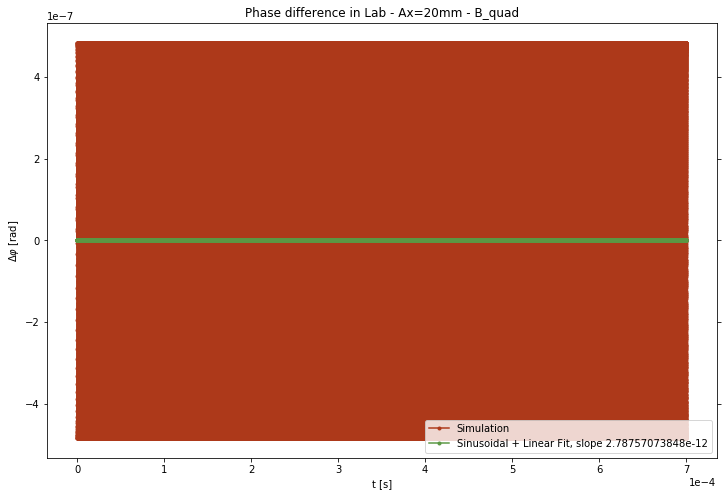

[  4.83091665e-07   3.91331058e+07   2.78757074e-12] [[  1.11008484e-29   5.48848323e-20   4.17026034e-32]
 [  5.48848323e-20   5.11784333e-10   7.54799534e-21]
 [  4.17026250e-32   7.54799566e-21   1.59517725e-23]]


In [38]:
#spl.plot_single('Phase difference in Lab - '+middle[m]+' - '+end[n], abs_phi[m][n]/29.3, time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', False, '.')

pars, covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[m][n]/29.3, [/(29.3**2)])
#pars, covs = curve_fit(combined_zero, time_arr*29.3, abs_phi[m][n]/29.3, [6e-7, wx/29.3, 0])
print pars, covs

spl.plot_comparative('Phase difference in Lab - '+middle[m]+' - '+end[n], [abs_phi[m][n]/29.3, lin_zero(time_arr*29.3, pars[2])], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Sinusoidal + Linear Fit, slope '+str(pars[2])], '.-')

In [15]:
#spl.plot_single('Frequency difference in CF - '+middle[m]+' - '+end[n], abs_phi[m][n][10000:]/time_arr[10000:], time_arr[10000:], 'show', r"$\delta \omega'$ [rad s$^{-1}$]", False, '.')
m=0
n=0

fpars, fcovs = curve_fit(lin_off, time_arr[10000:], abs_phi[m][n][10000:]/time_arr[10000:], [0])
#fpars, fcovs = curve_fit(combined, time_arr[10000:], abs_phi[m][n][10000:]/time_arr[10000:], [5e-10, wx, 0, 0])
print fpars, fcovs

#spl.plot_comparative('Frequency difference in CF - '+middle[m]+' - '+end[n], [abs_phi[m][n][10000:]/time_arr[10000:], lin(time_arr[10000:], fpars[0], fpars[1])], time_arr[10000:], 'both', r"$\delta \omega'$ [rad s$^{-1}$]", ['Simulation', 'Linear Fit, slope '+str(fpars[0])+', offset '+str(fpars[1])], '.-')
#spl.plot_comparative('Frequency difference in CF - '+middle[m]+' - '+end[n], [abs_phi[m][n][10000:]/time_arr[10000:], lin_off(time_arr[10000:], fpars[0])], time_arr[10000:], 'both', r"$\delta \omega'$ [rad s$^{-1}$]", ['Simulation', 'Linear Fit,  offset '+str(fpars[0])], '.-')


[ 0.00149505] [[ 0.00437074]]


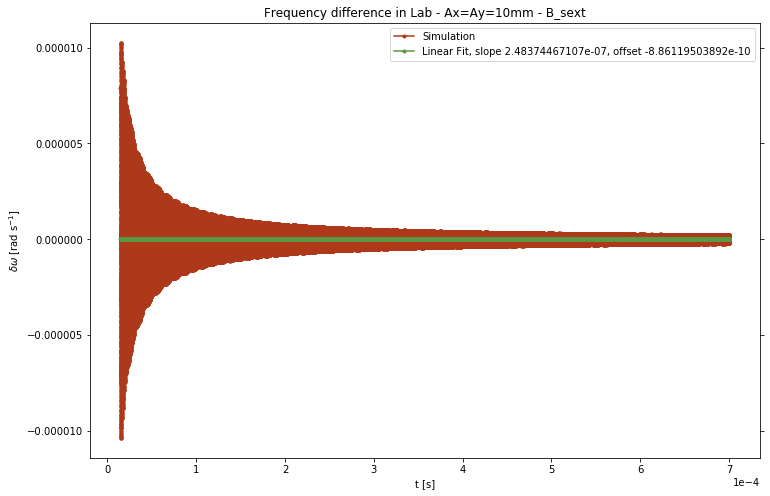

[  2.48374467e-07  -8.86119504e-10] [[  2.95832365e-11  -1.05748237e-14]
 [ -1.05748237e-14   4.93894257e-18]]


In [17]:
#spl.plot_single('Frequency difference in Lab - '+middle[m]+' - '+end[n], abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]), time_arr[10000:]*29.3, 'both', r"$\delta \omega$ [rad s$^{-1}$]", False, '.')

fpars, fcovs = curve_fit(lin, time_arr[10000:]*29.3, abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]), [0, 0])
#fpars, fcovs = curve_fit(combined, time_arr[10000:]*29.3, abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]), [3e-7, wx/29.3, 0, 0])
print fpars, fcovs

spl.plot_comparative('Frequency difference in Lab - '+middle[m]+' - '+end[n], [abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]), lin(time_arr[10000:]*29.3, fpars[0], fpars[1])], time_arr[10000:]*29.3, 'both', r"$\delta \omega$ [rad s$^{-1}$]", ['Simulation', 'Linear Fit, slope '+str(fpars[0])+', offset '+str(fpars[1])], '.-')

In [ ]:
#spl.plot_single('Relative frequency difference in CF - '+middle[m]+' - '+end[n], -1*rel_phi[m][n][10000:], time_arr[10000:], 'both', r"$\delta \omega' \div \omega_{a,0}'$", False, '.')

#relpars, relcovs = curve_fit(lin, time_arr[10000:], -1*rel_phi[m][n][10000:], [0, 0])
relpars, relcovs = curve_fit(combined, time_arr[10000:], -1*rel_phi[m][n][10000:], [2e-16, wx, 0, 0])
print relpars, relcovs

#spl.plot_comparative('Relative frequency difference in CF - '+middle[m]+' - '+end[n], [-1*rel_phi[m][n][1:], combined(time_arr[1:], relpars[0], relpars[1], relpars[2], relpars[3])], time_arr[1:], 'show', r"$\delta \omega' \div \omega_{a,0}'$", ['Simulation', 'Fit'], '.-', (2e-5, 2.001e-5), (-2.5e-11, 2.5e-11))
spl.plot_comparative('Relative frequency difference in CF - '+middle[m]+' - '+end[n], [-1*rel_phi[m][n][10000:], lin(time_arr[10000:], relpars[2], relpars[3])], time_arr[10000:], 'both', r"$\delta \omega' \div \omega_{a,0}'$", ['Simulation', 'Sinusoidal + Linear Fit, slope '+str(relpars[2])+', offset '+str(relpars[3])], '.-')


In [ ]:
wa = -1.6021766208e-19 / (105.6583745e6 * 1.783e-36) * 0.00116592091 * 1.4513
#spl.plot_single('Relative frequency difference in Lab - '+middle[m]+' - '+end[n], abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]*wa), time_arr[10000:]*29.3, 'both', r"$\delta \omega \div \omega_{a,0}$", False, '.')

#relpars, relcovs = curve_fit(lin, time_arr[10000:]*29.3, abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]*wa), [0, 0.75e-9])
relpars, relcovs = curve_fit(combined, time_arr[10000:]*29.3, abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]*wa), [1e-9*3e-4, wx/29.3, 0, 0])
print relpars, relcovs

spl.plot_comparative('Relative frequency difference in Lab - '+middle[m]+' - '+end[n], [abs_phi[m][n][10000:]/(29.3*29.3*time_arr[10000:]*wa), lin(time_arr[10000:]*29.3, relpars[2], relpars[3])], time_arr[10000:]*29.3, 'both', r"$\delta \omega \div \omega_{a,0}$", ['Simulation', 'Sinusoidal + Linear Fit, slope '+str(relpars[2])+', offset '+str(relpars[3])], '.-')


In [7]:
theta = np.empty([3,3,len(time_arr)])
for i in range(3):
    theta[0,i] = osci_x[i][5]
    theta[1,i] = osci_z[i][5]
    theta[2,i] = spiral[i][5]

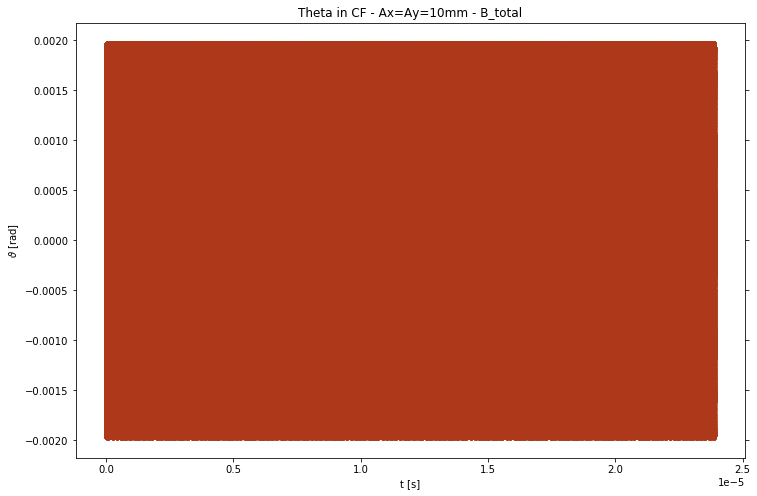

In [9]:
spl.plot_single('Theta in CF - '+middle[m]+' - '+end[n], theta[m][n], time_arr, 'both', r'$\vartheta$ [rad]', False, '.-')#, (1e-5, 1.001e-5))

def theta_fit(t, A, w1, w2, s, o):
    return A*np.sin(w1*t)*np.cos(w2*t) + lin(t, s, o)

#tpars, tcovs = curve_fit(theta_fit, time_arr, theta[m][n], [2e-7, -3.4972e10, wy, 0, 0])
#print tpars, tcovs

#spl.plot_comparative('Theta in CF - ZOOM - '+middle[m]+' - '+end[n], [theta[m][n], theta_fit(time_arr, tpars[0], tpars[1], tpars[2], tpars[3], tpars[4])], time_arr, 'show', r'$\vartheta$ [rad]', ["Simulation", "Fit"], '.-', (2e-5, 2.001e-5))


In [ ]:
np.max(abs_phi[0][0])

In [ ]:
middle = ['Ax=10mm', 'Ay=10mm', 'Ax=Ay=10mm']
end = ['B_quad', 'B_sext', 'B_total']
for i in range(3):
    for j in range(3):
        cfphase_pars, cfphase_covs = curve_fit(combined_zero, time_arr, abs_phi[i][j], [abs_phi[i][j][-1]/23.9e-6])
        spl.plot_comparative('Phase difference in CF - '+middle[i]' - '+end[j], [abs_phi[i][j], lin_zero(time_arr, cfphase_pars[0])], time_arr, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(cfphase_pars[0])], '.-')
        
        lphase_pars, lphase_covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[i][j]/29.3, [abs_phi[i][j][-1]/(29.3*29.3*23.9e-6)]
        spl.plot_comparative('Phase difference in Lab - '+middle[i]' - '+end[j], [abs_phi[i][j]/29.3, lin_zero(time_arr*29.3, lphase_pars[0])], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(lphase_pars[0])], '.-')
        
        cgfreq_pars, cffreq_covs = curve_fit
                                             